<a href="https://colab.research.google.com/github/Seb-GJ/PredictingTurnover/blob/main/Predicting_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("soylevbeytullah/ds4work-human-resources")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/soylevbeytullah/ds4work-human-resources/versions/1


In [3]:
import os

# Listar archivos en el directorio
print(os.listdir(path))

['Human_Resources.csv']


In [4]:
df = pd.read_csv('Human_Resources.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [7]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [8]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [9]:
attrition = []
for i in df['Attrition']:
  if i == 'Yes':
    attrition.append(1)
  else:
    attrition.append(0)

df['Class'] = attrition

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Class
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [11]:
df['Department'].value_counts()

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


<Axes: ylabel='Class'>

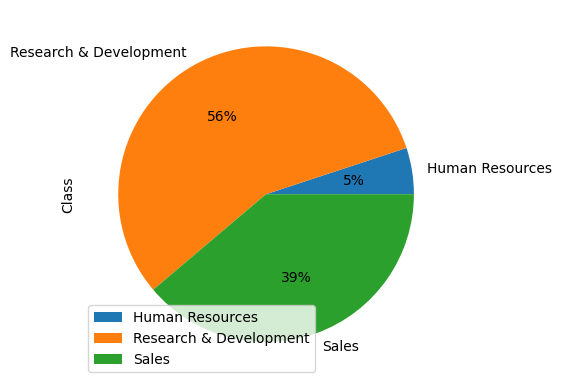

In [12]:
df.groupby(['Department']).sum().plot(kind='pie',y='Class',autopct='%1.0f%%')

<Axes: xlabel='Attrition'>

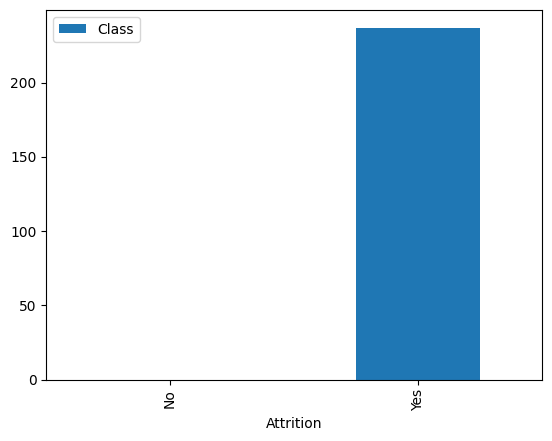

In [13]:
df.groupby(['Attrition']).sum().plot(kind='bar',y='Class')

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Class
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [15]:
plot_features = df.drop(df[['Attrition','Class','EmployeeNumber','EmployeeCount','StandardHours','Over18']], axis=1)
plot_y = df['Class']


In [16]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


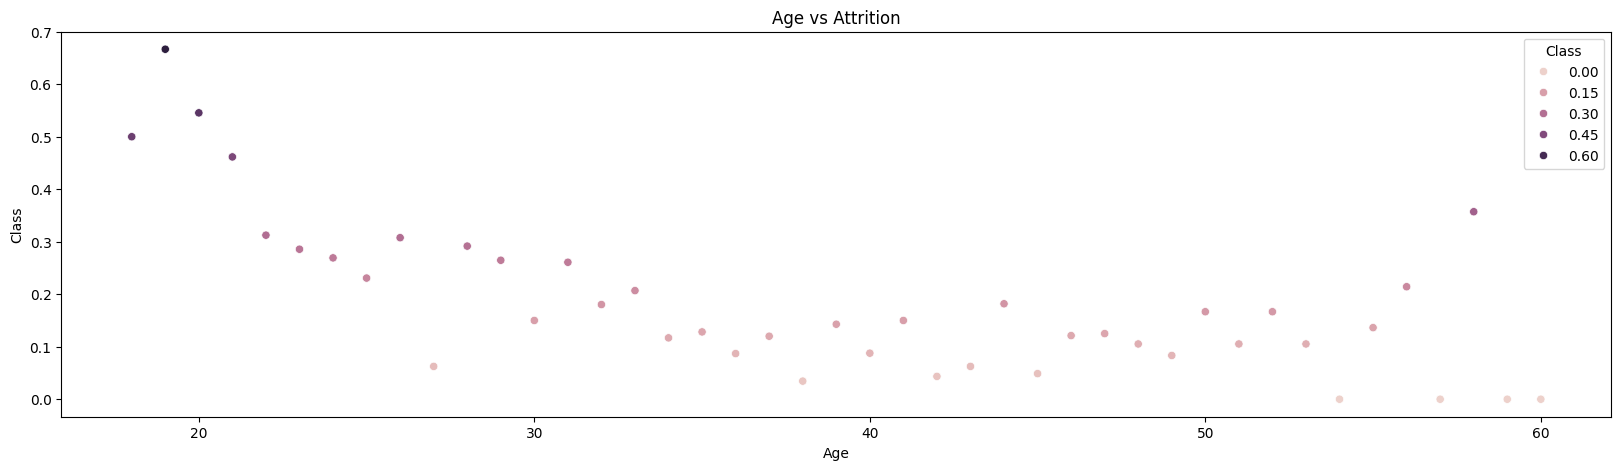

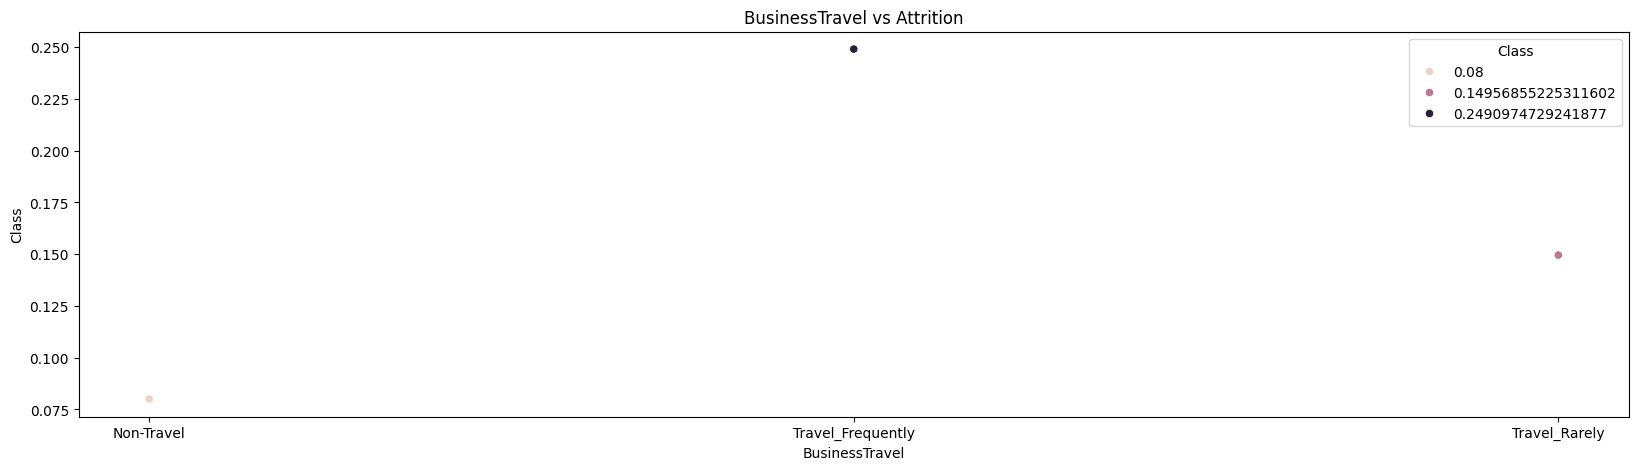

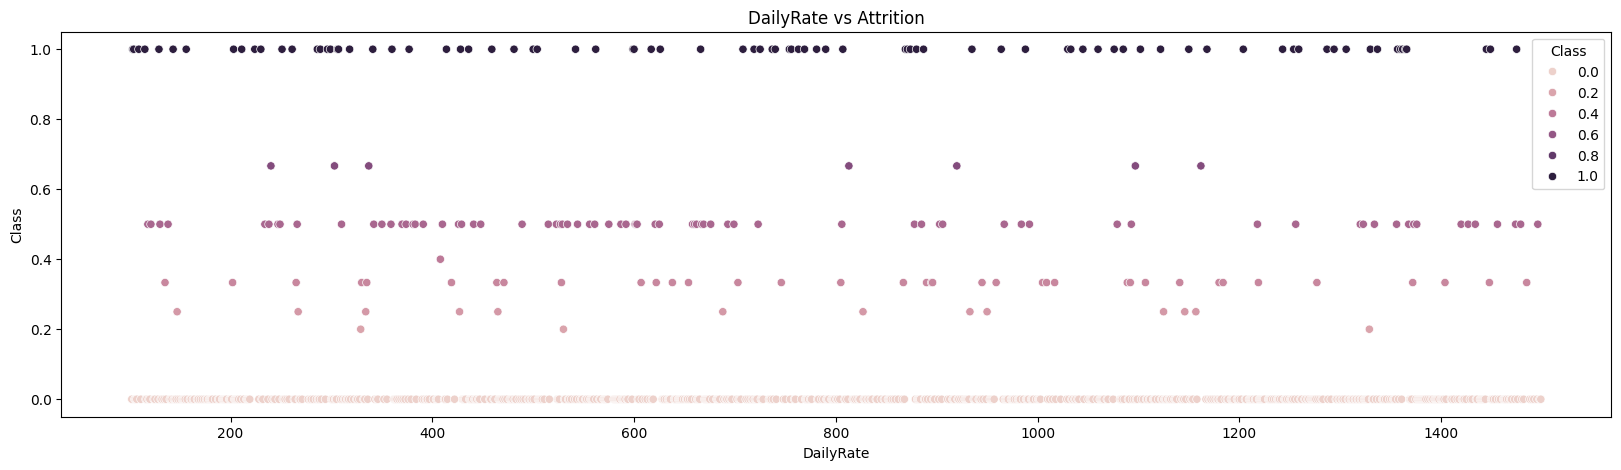

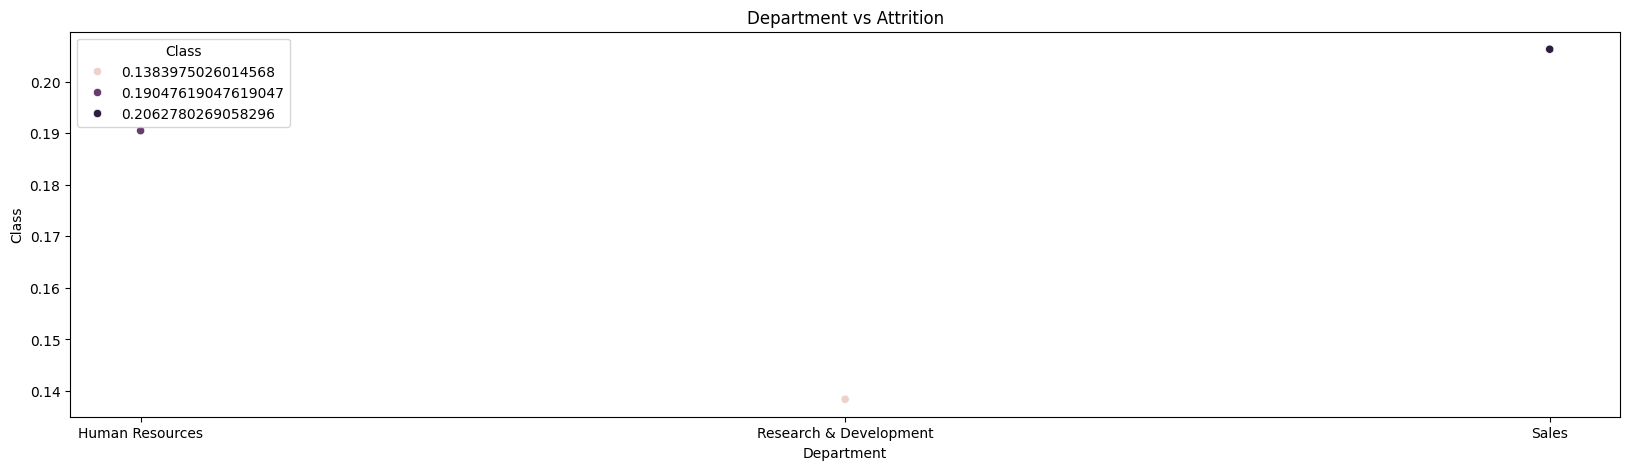

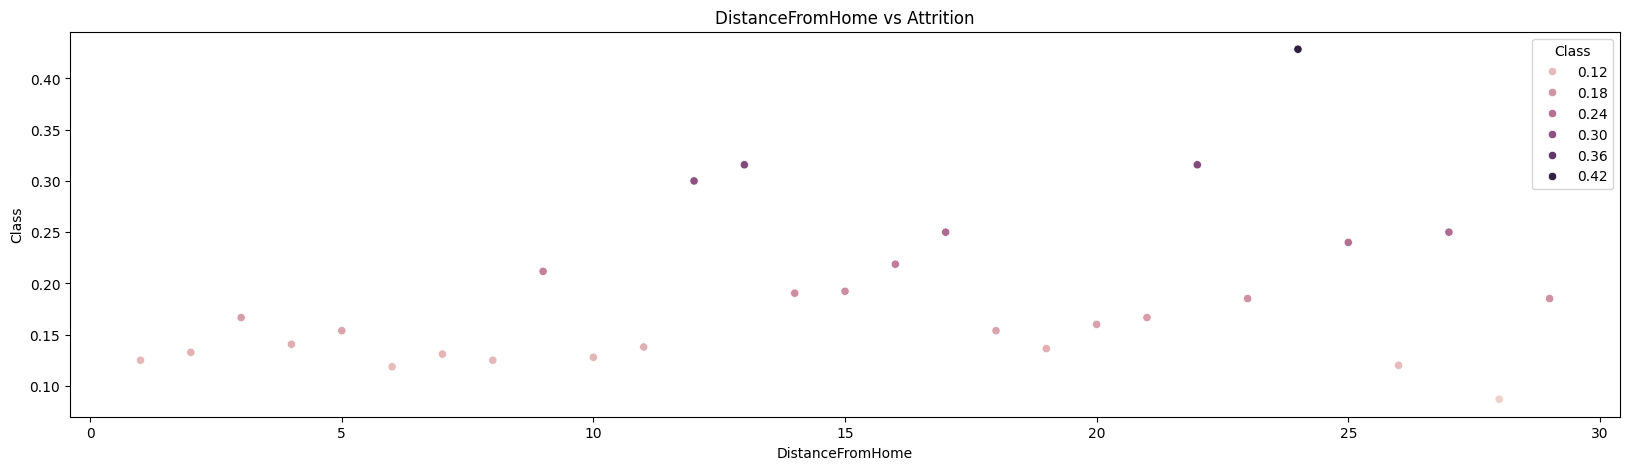

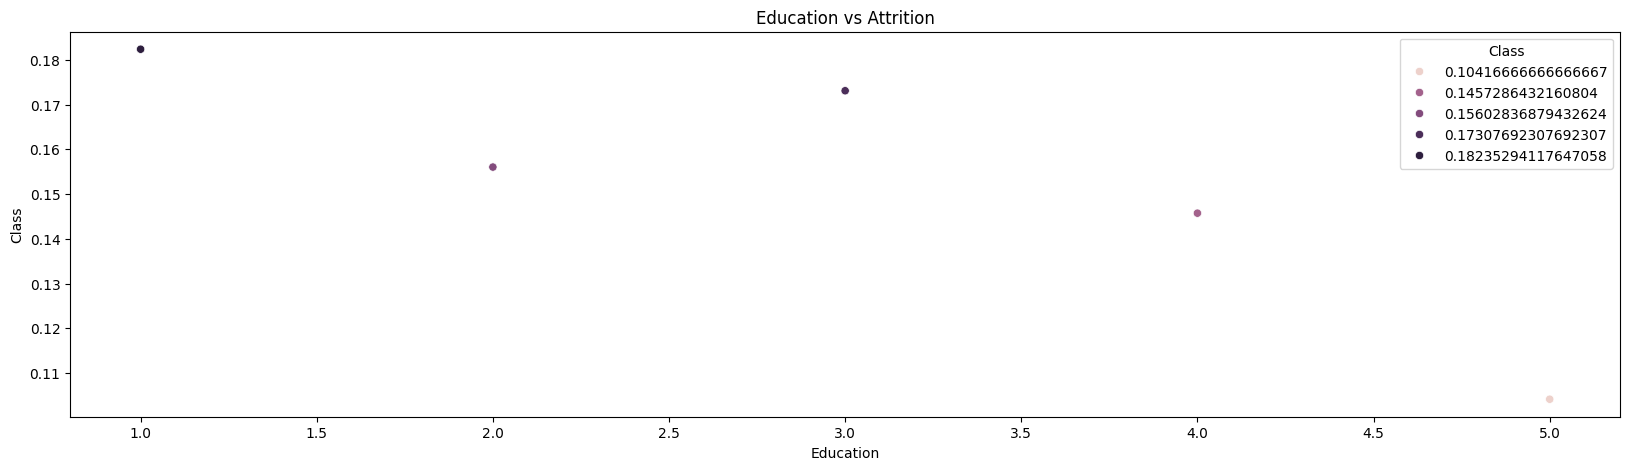

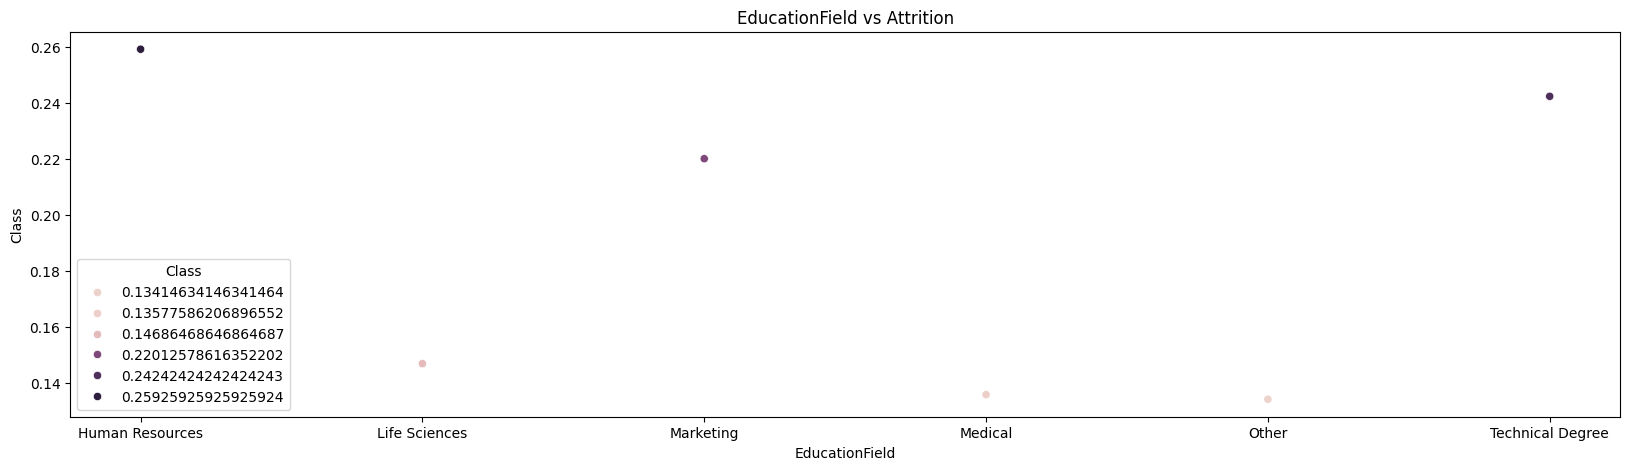

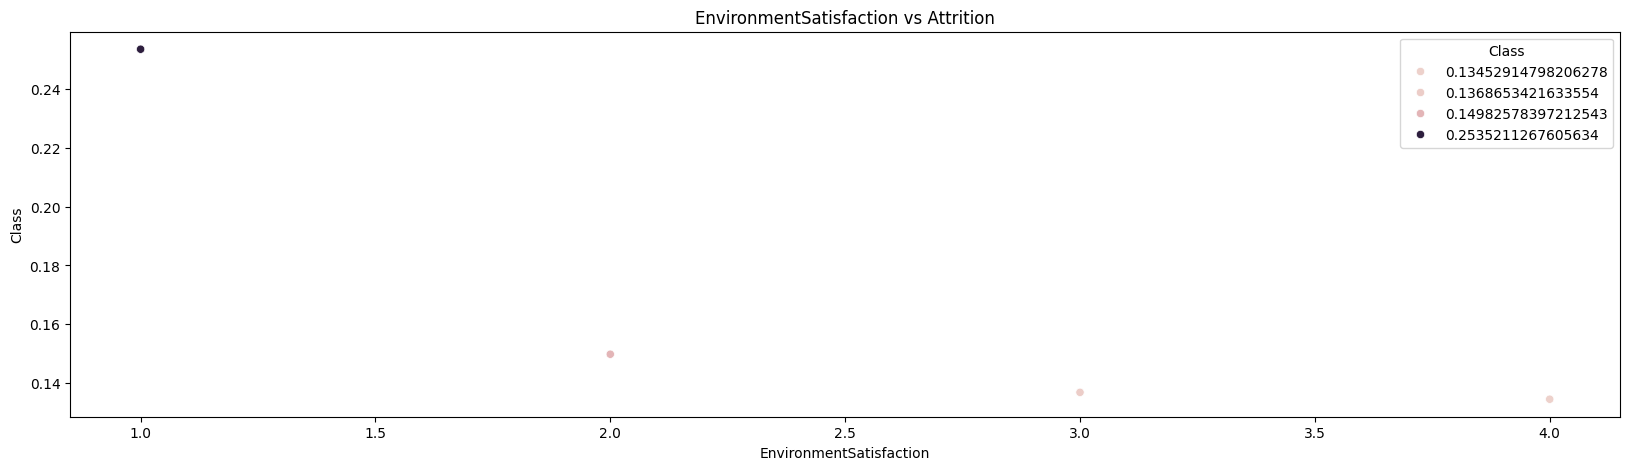

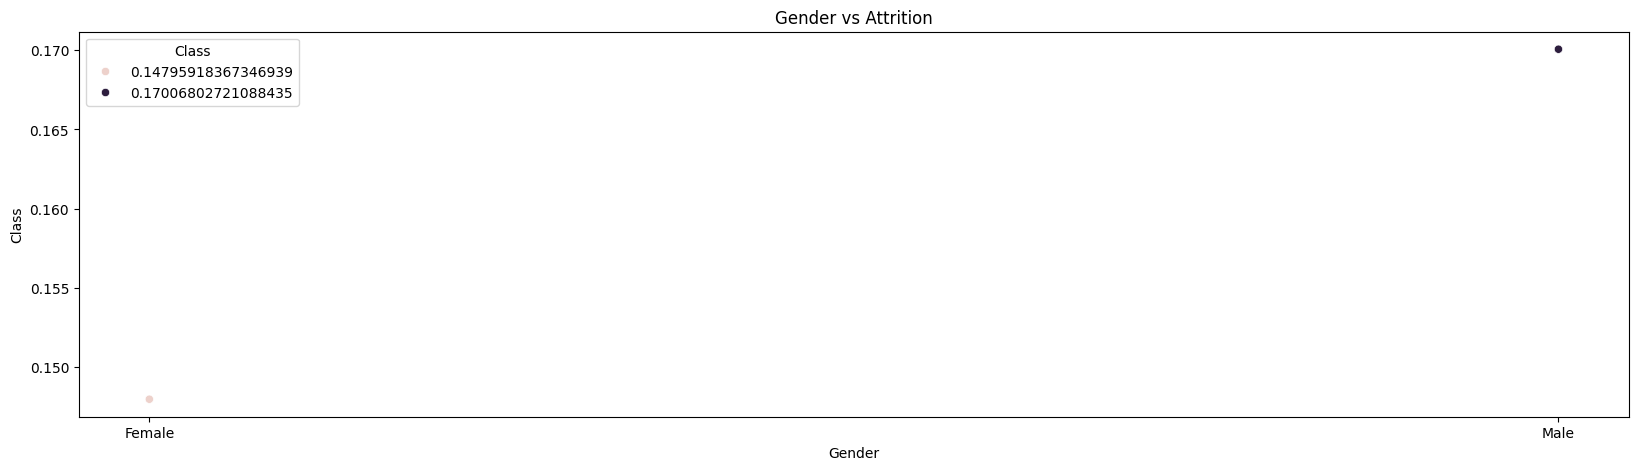

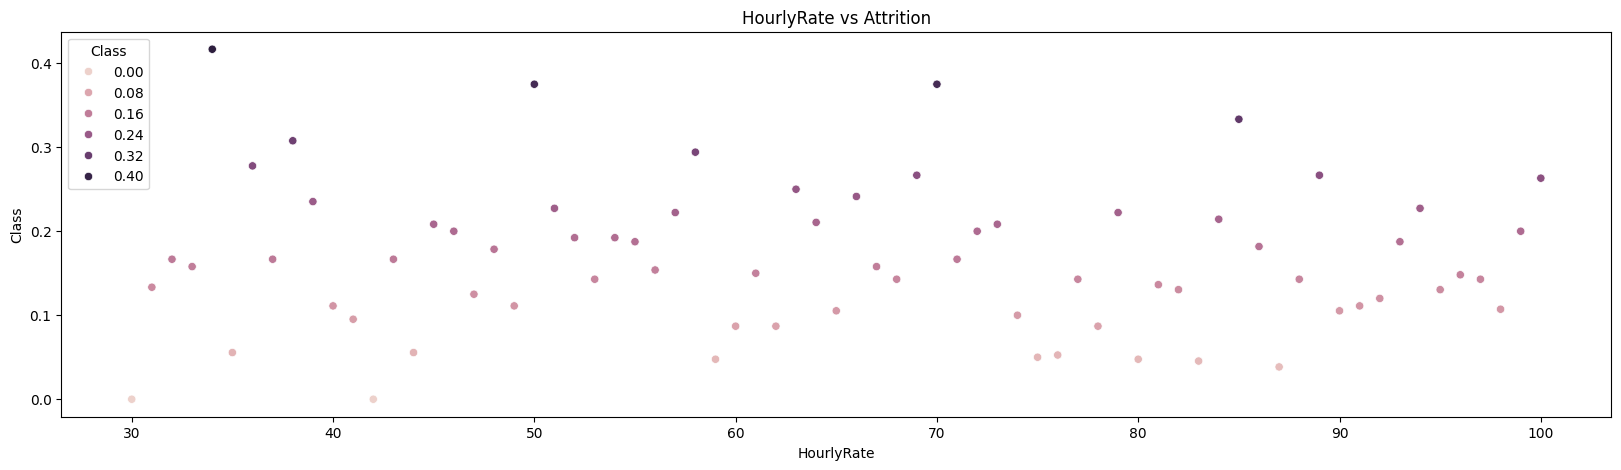

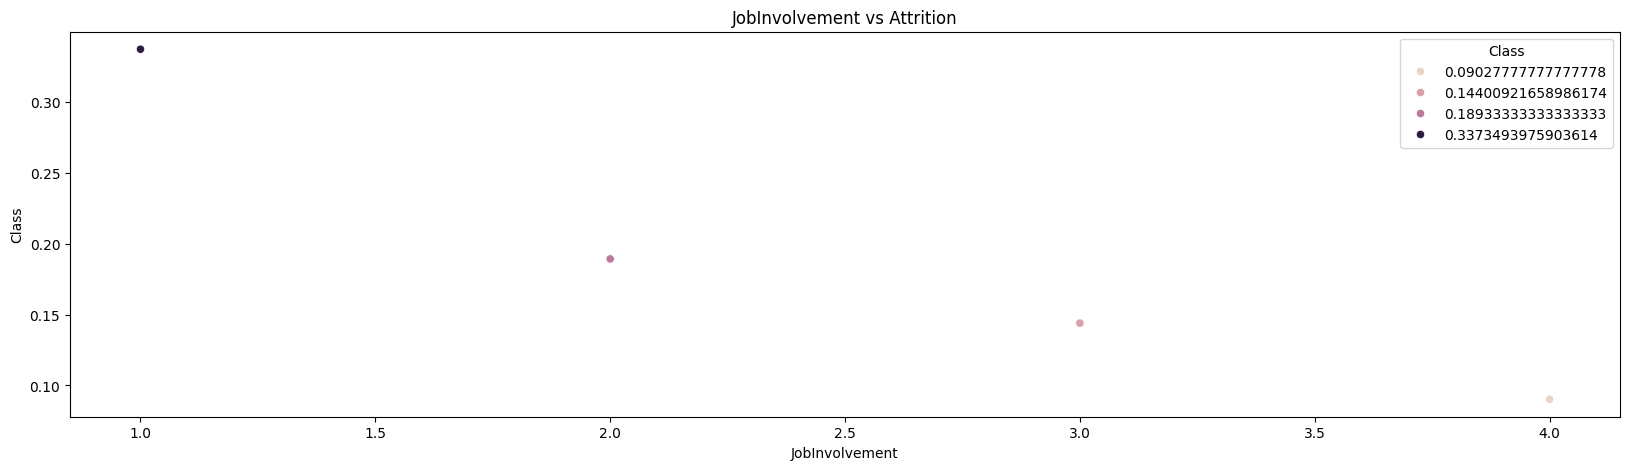

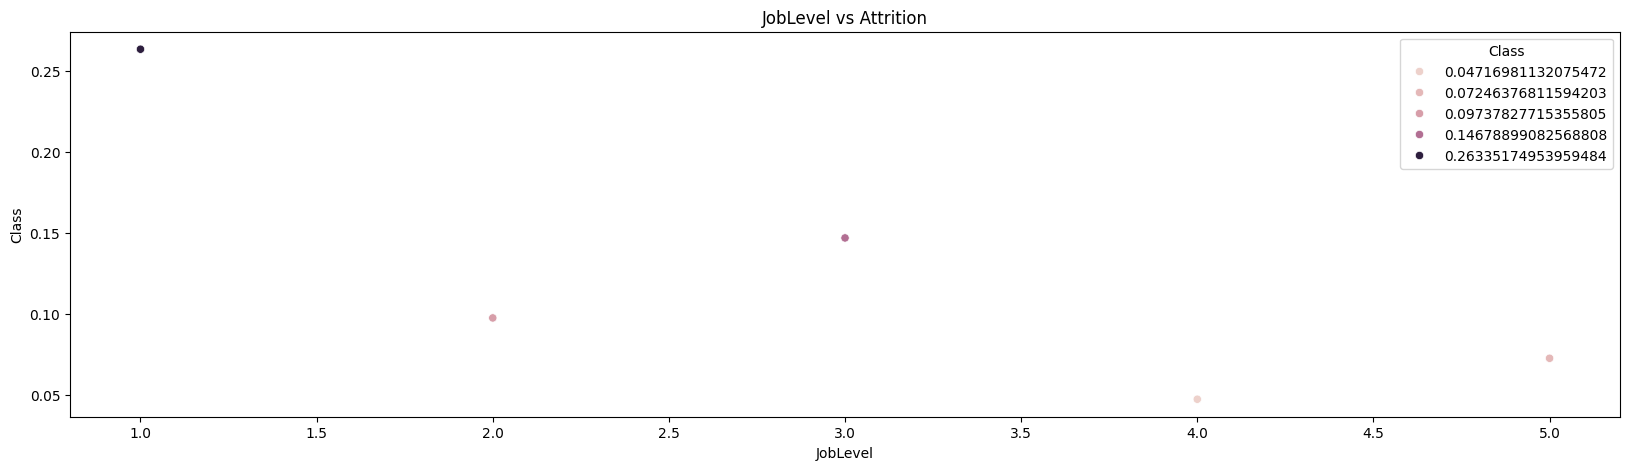

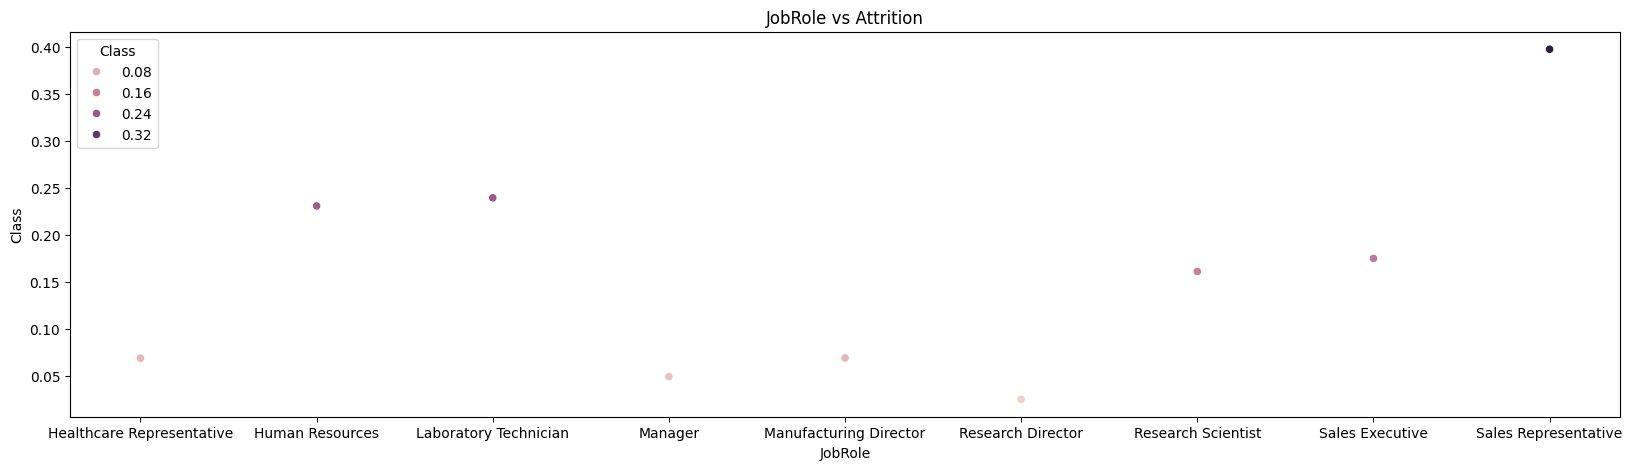

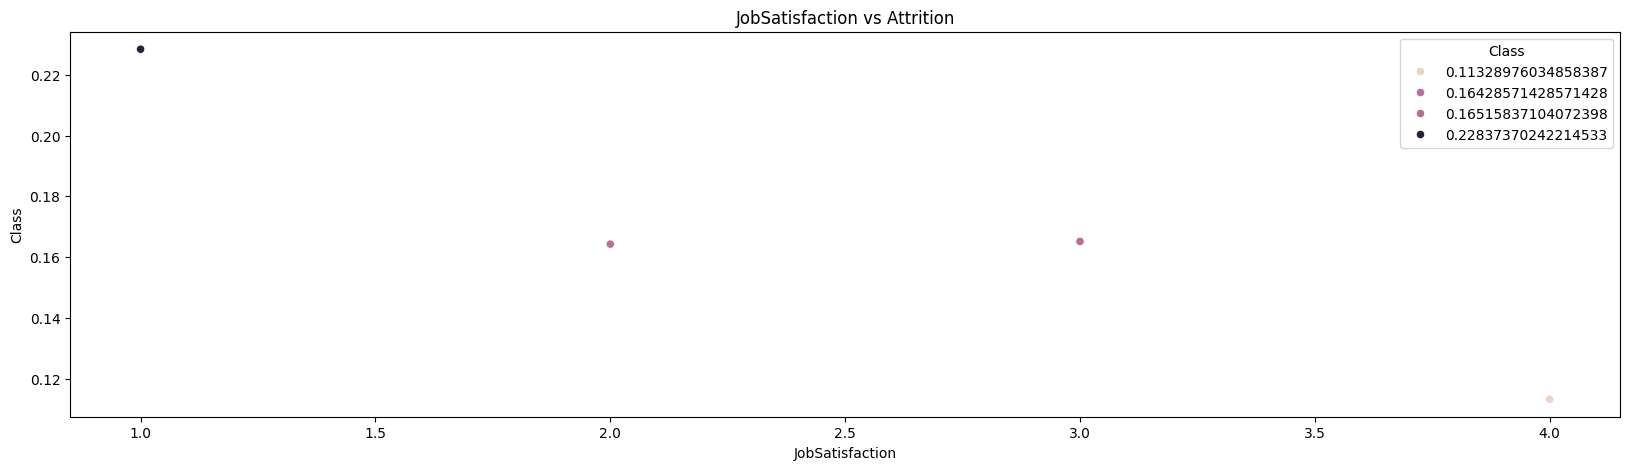

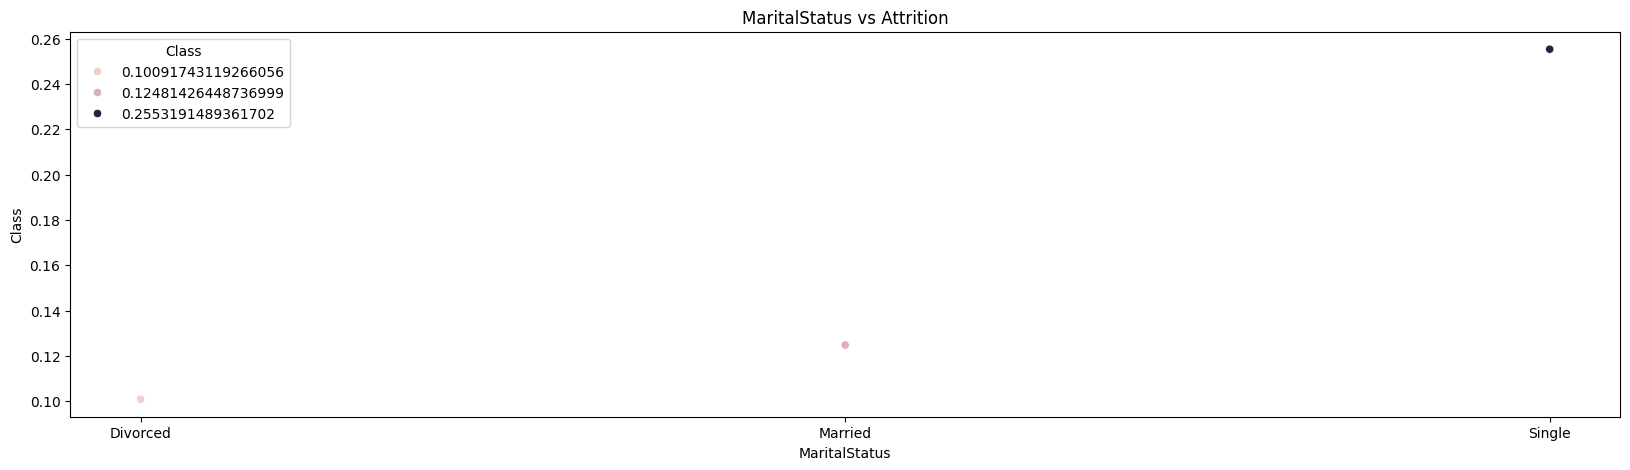

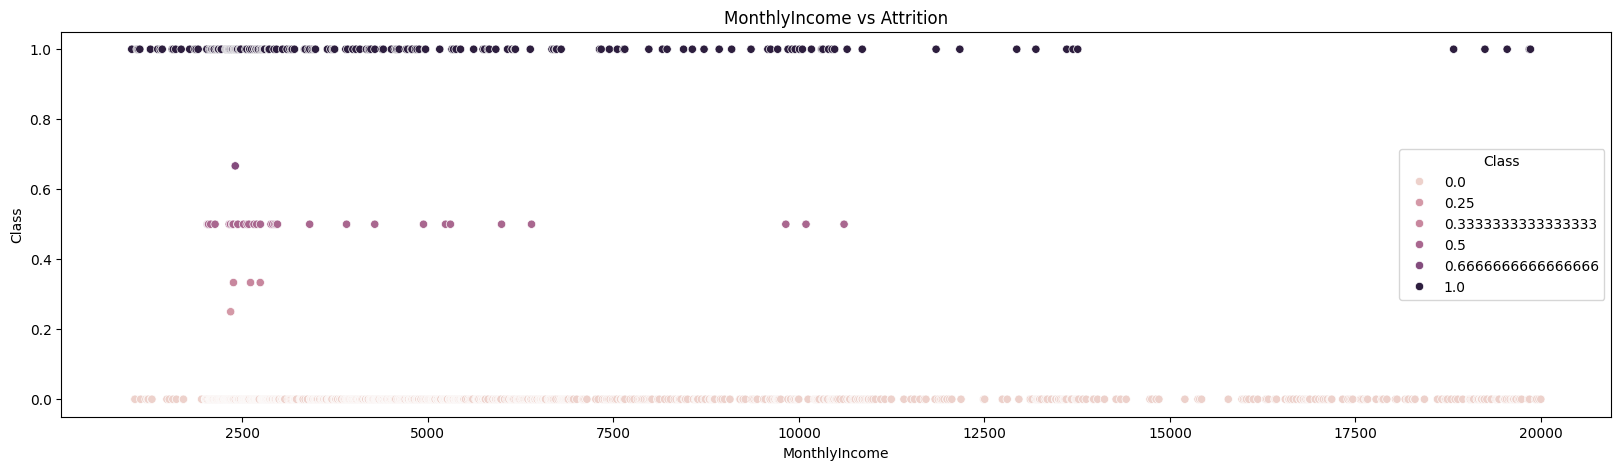

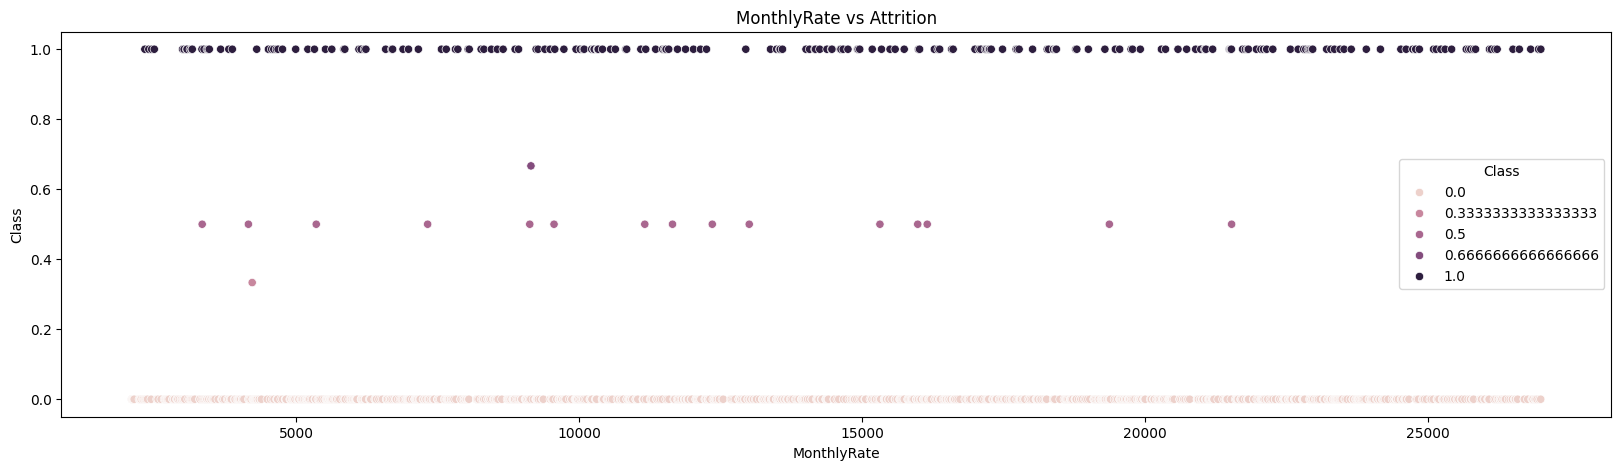

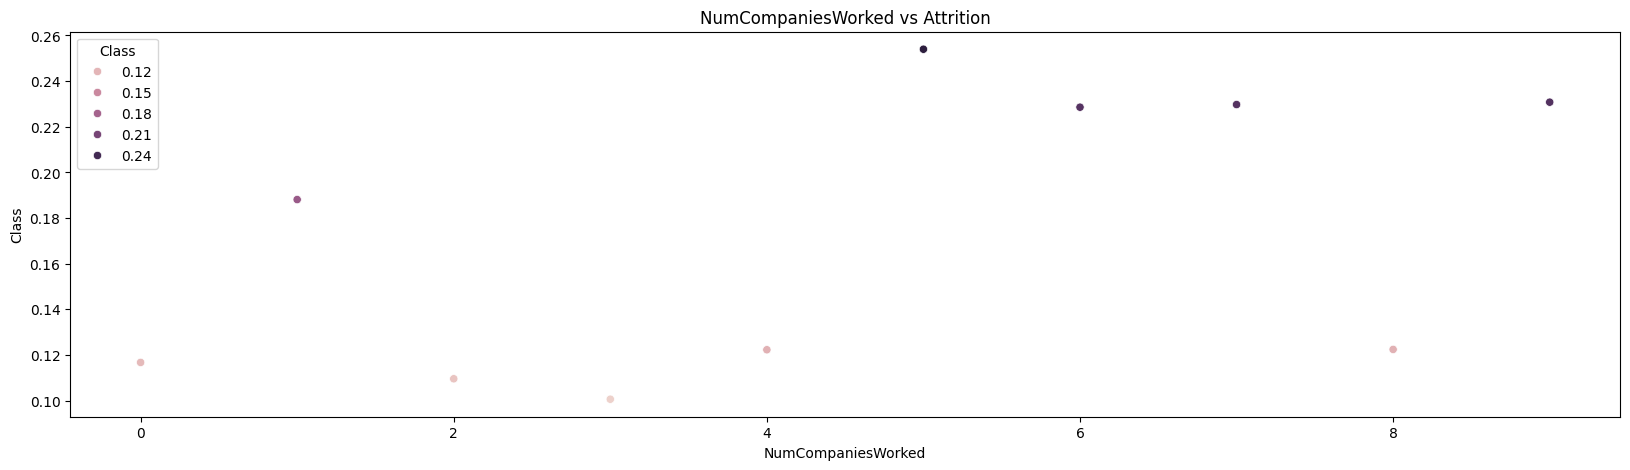

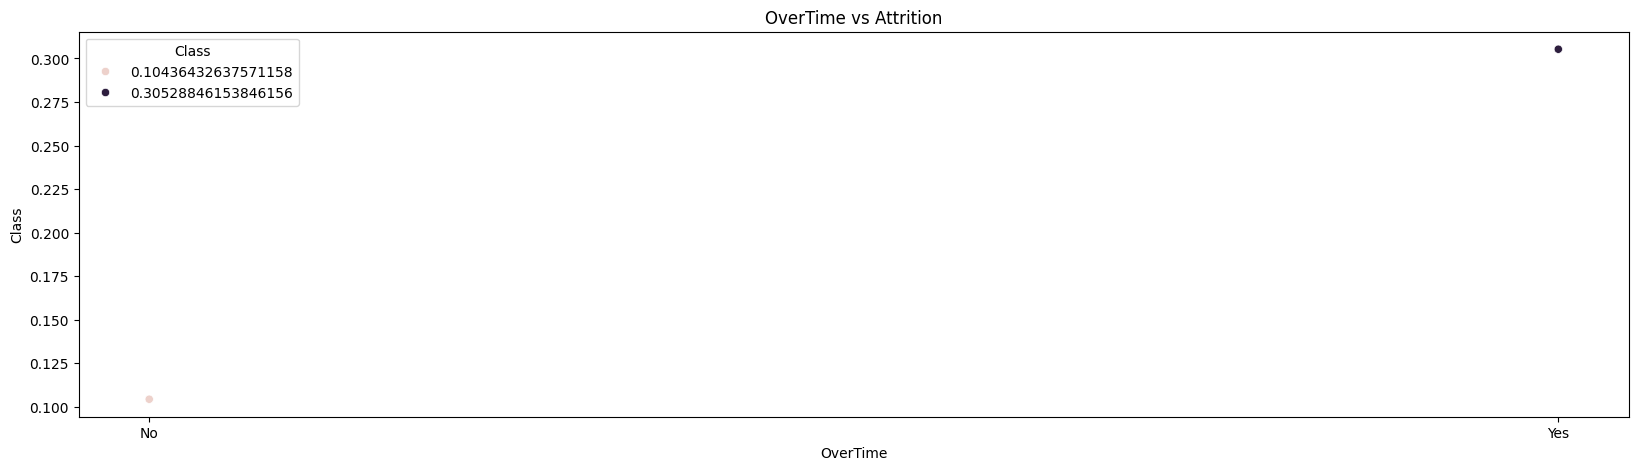

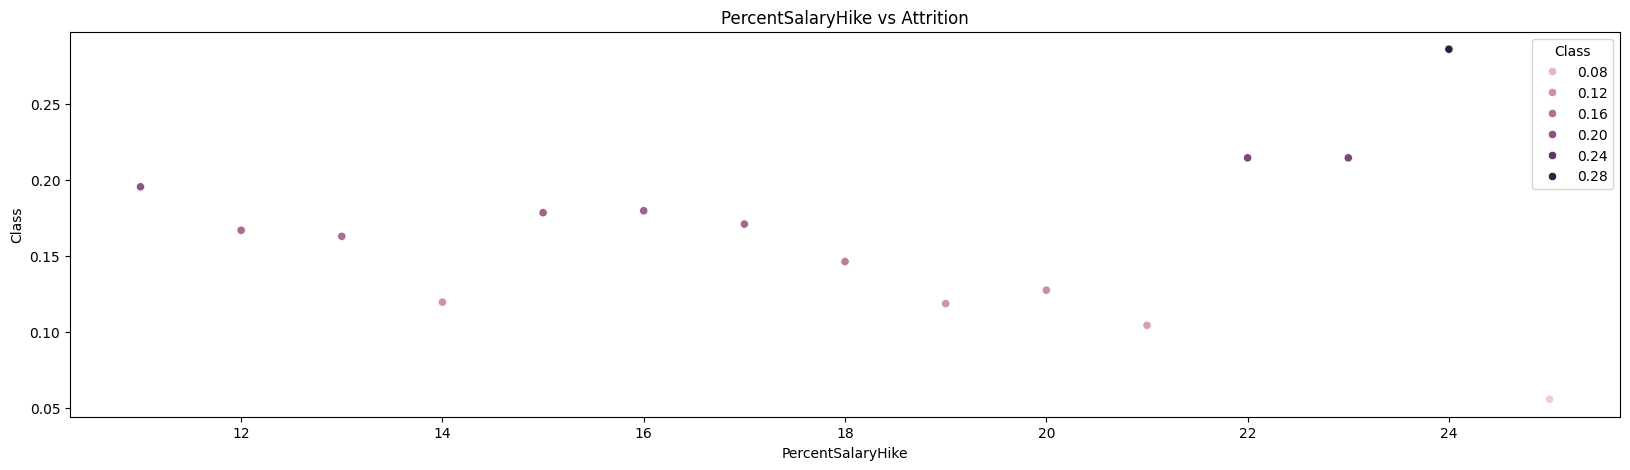

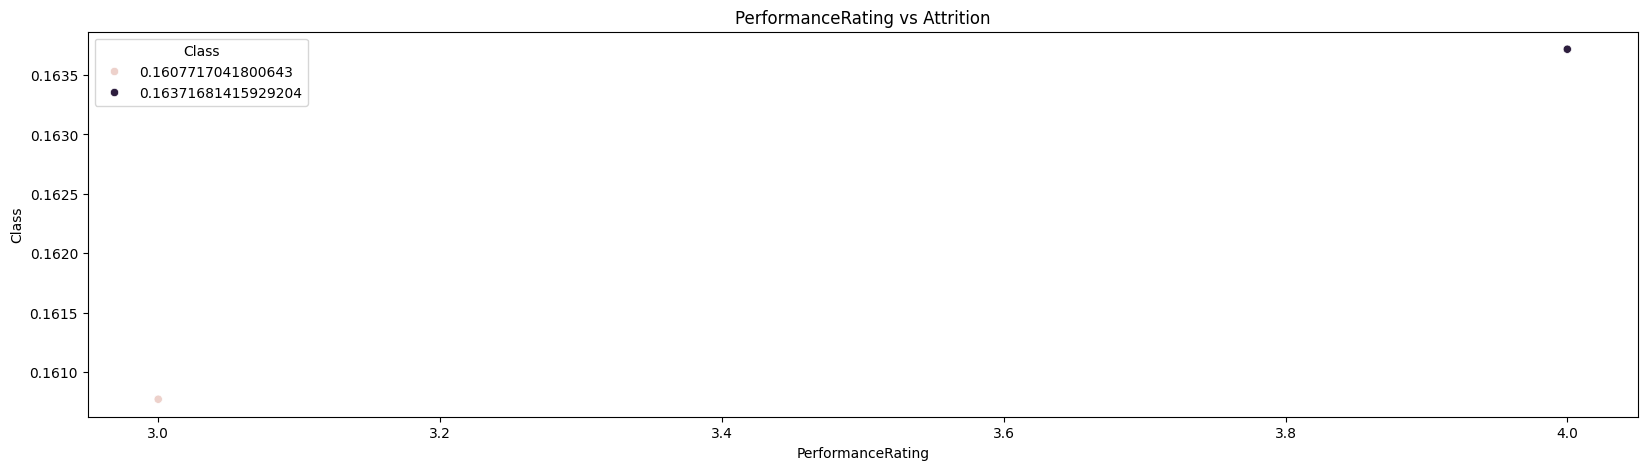

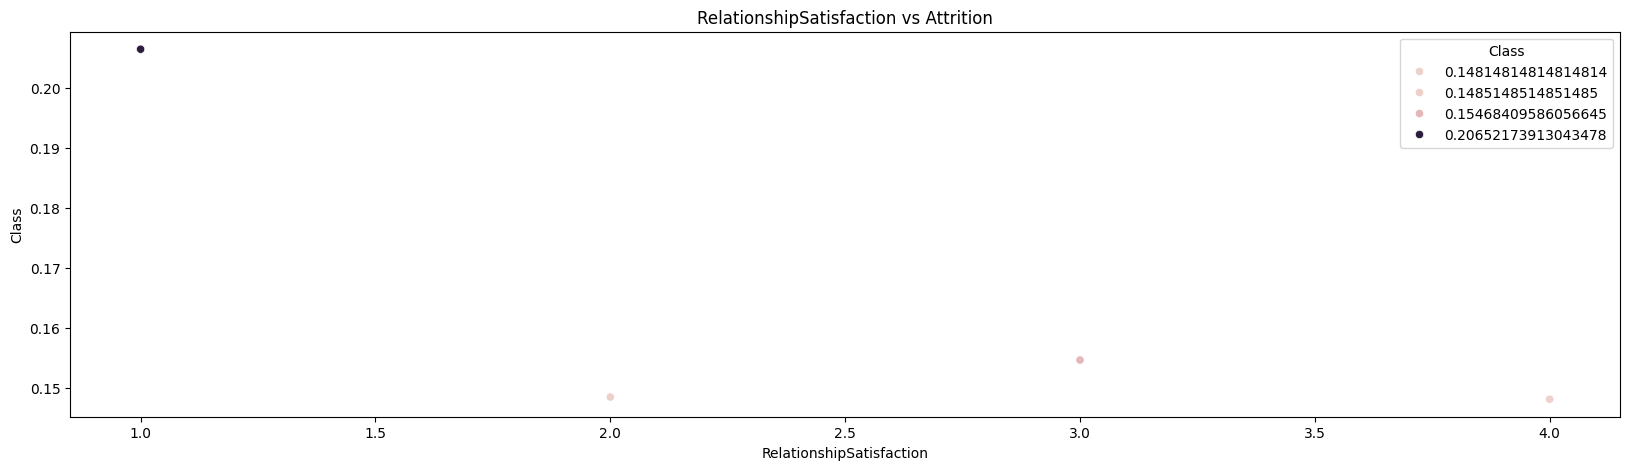

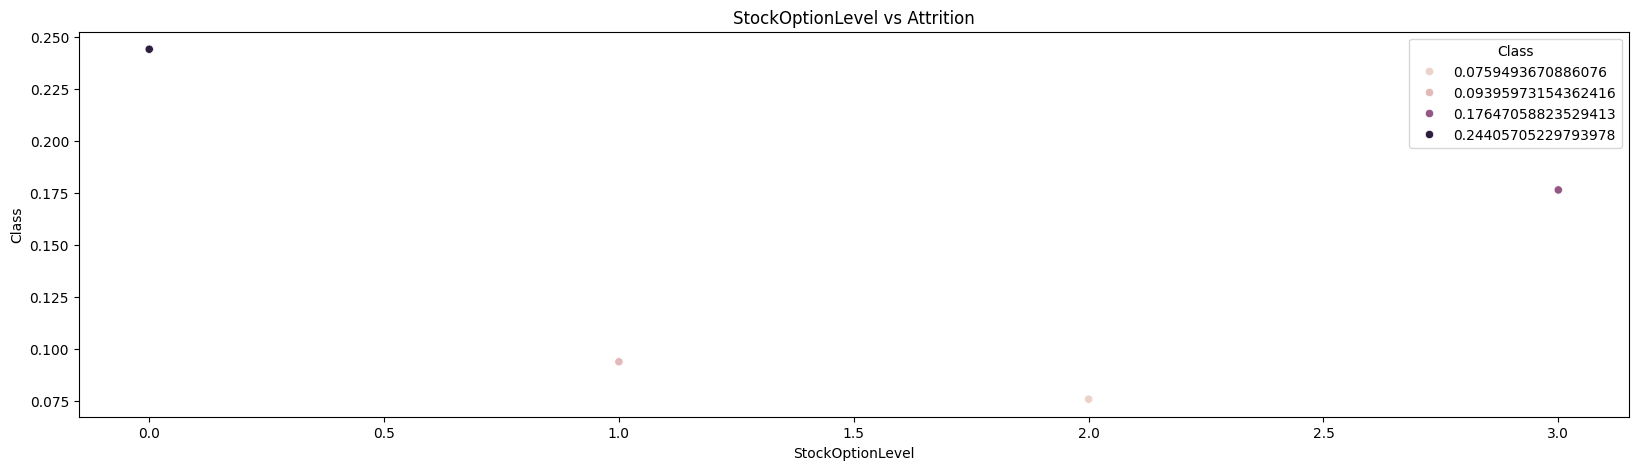

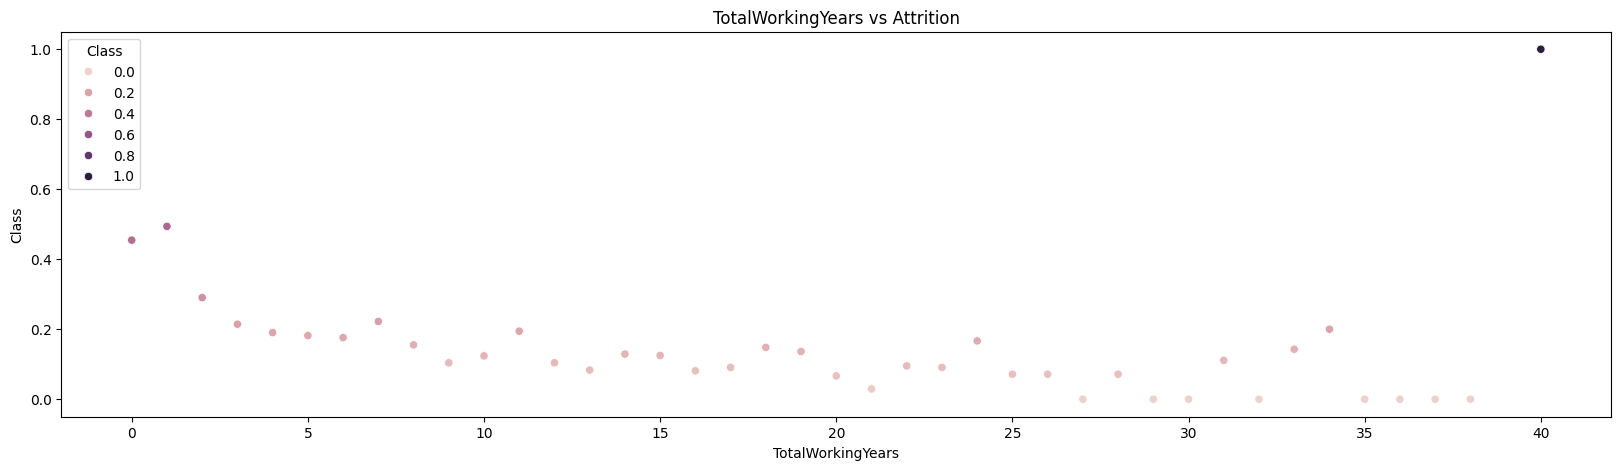

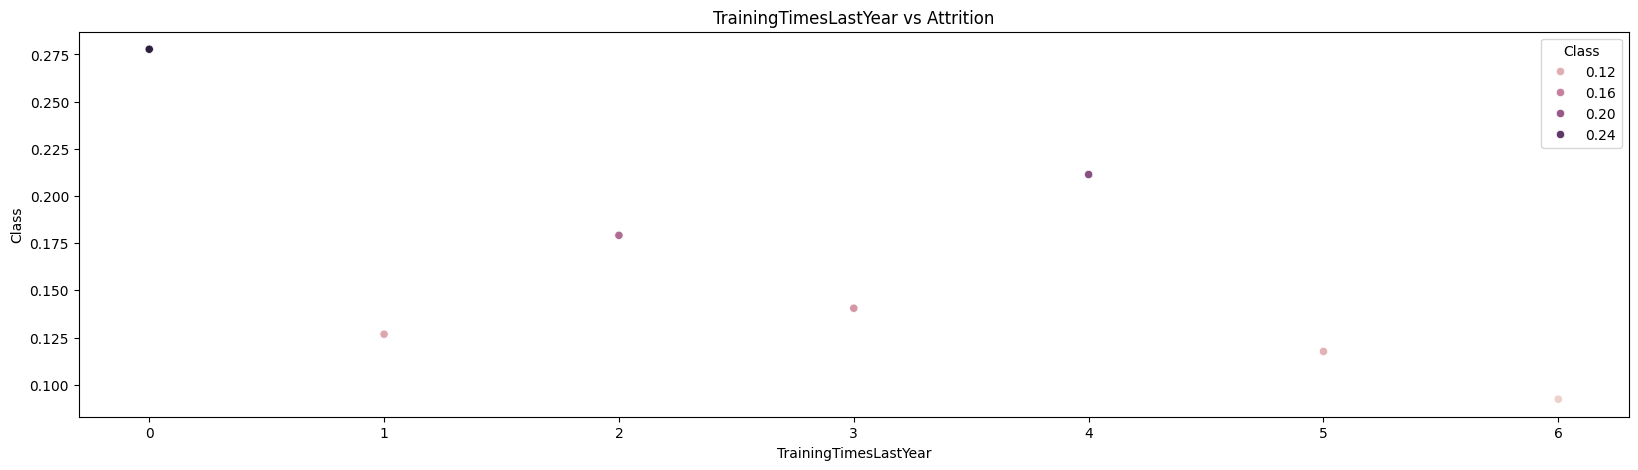

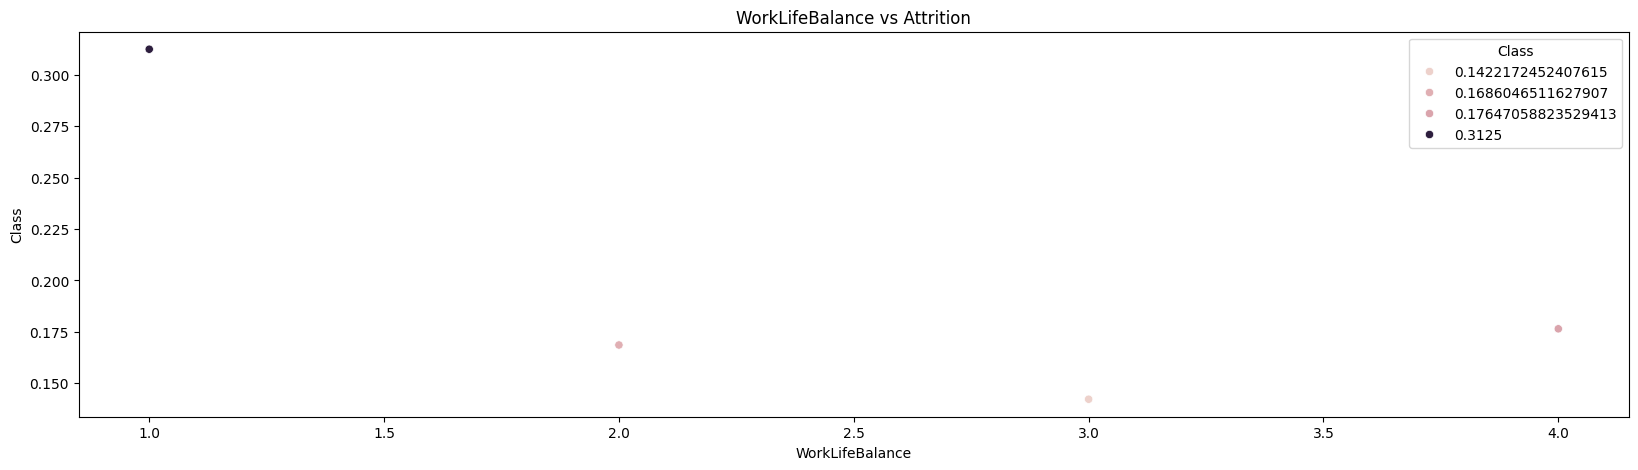

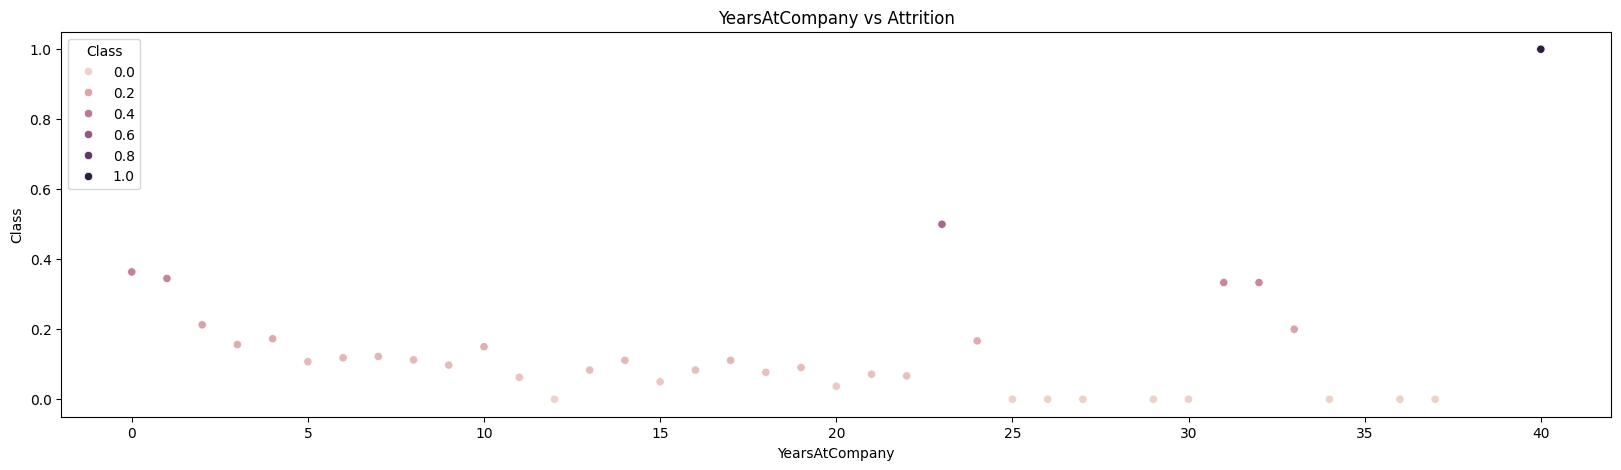

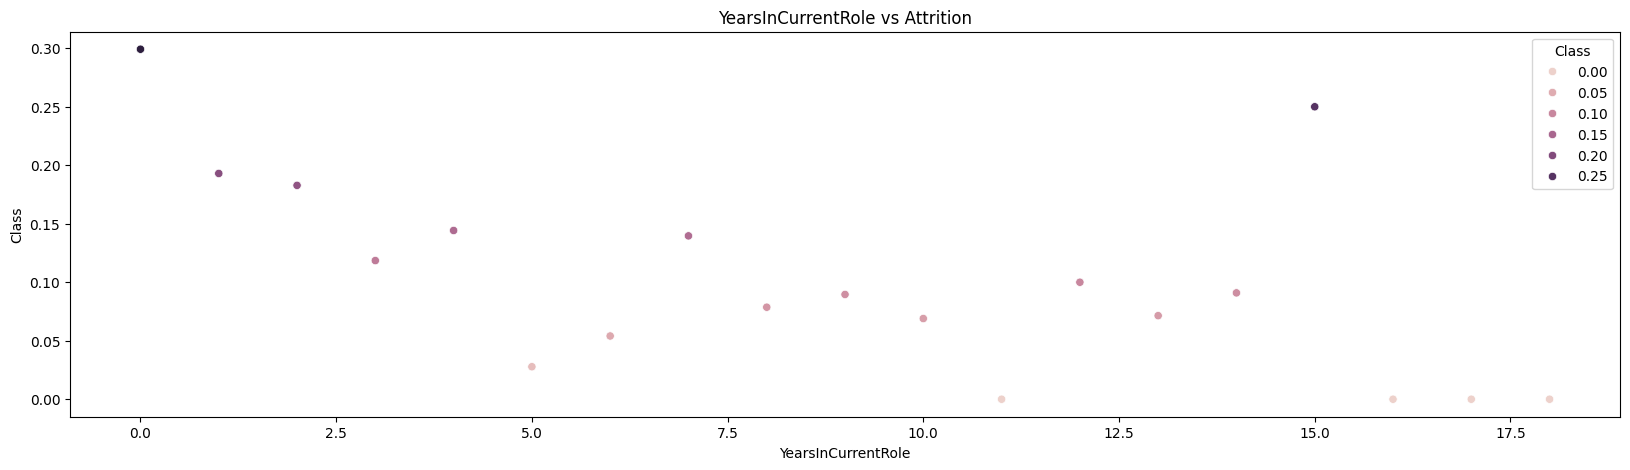

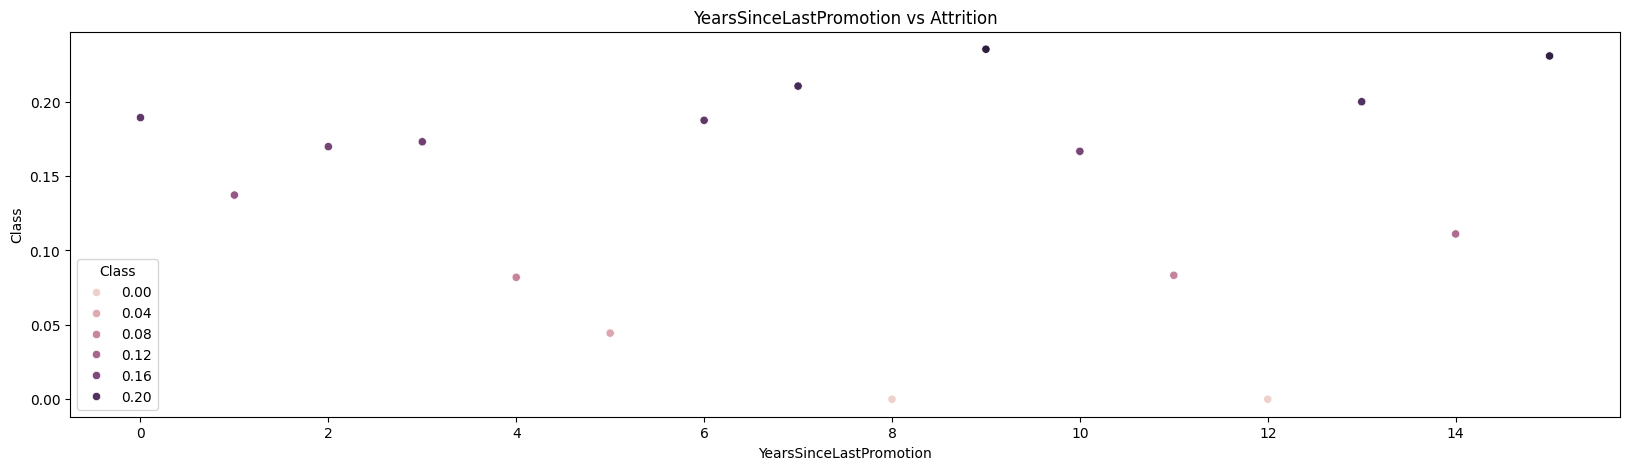

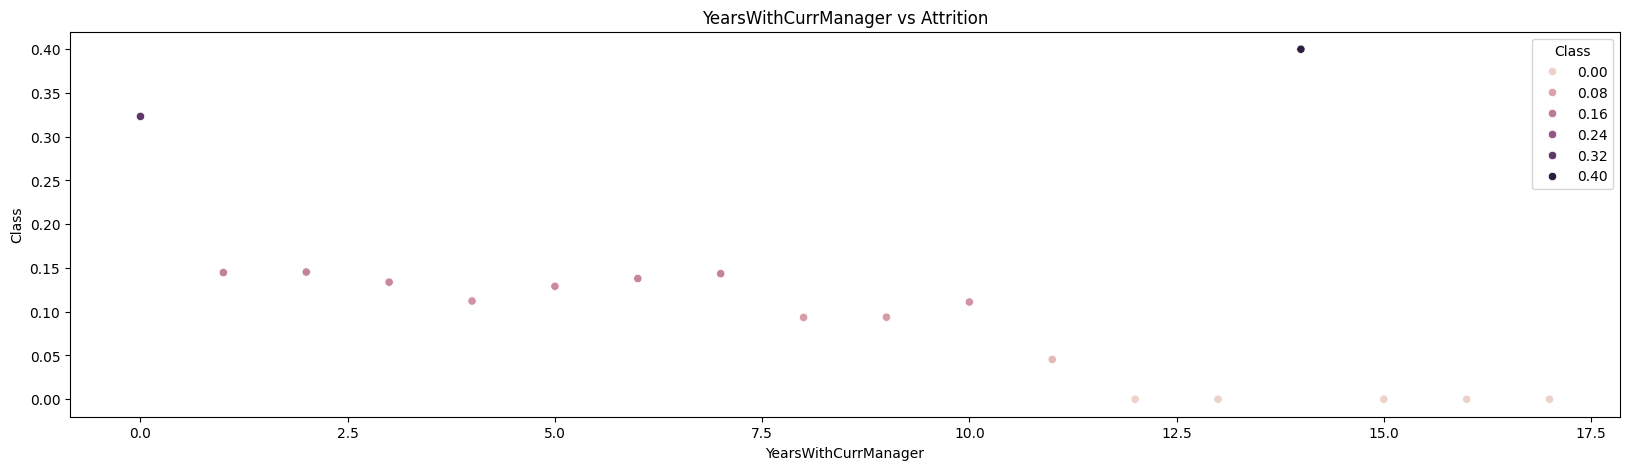

In [17]:

for feature in plot_features:
  plt.subplots(figsize=(20,5))
  df_feature = df.groupby(feature,as_index=False)['Class'].mean()
  sns.scatterplot(x=feature,y='Class',data = df_feature,hue='Class')
  plt.title(f'{feature} vs Attrition')
  plt.show()



# __Predictions__

Tenemos que identificar y pasar las variables categóricas a variables numéricas

In [18]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [19]:
x = df.drop(df[['EmployeeNumber','EmployeeCount','Over18','Attrition','Class','StandardHours']],axis=1)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [20]:
x['BusinessTravel']

,BusinessTravel
0,Travel_Rarely
1,Travel_Frequently
2,Travel_Rarely
3,Travel_Frequently
4,Travel_Rarely
...,...
1465,Travel_Frequently
1466,Travel_Rarely
1467,Travel_Rarely
1468,Travel_Frequently


In [21]:
cat_values= ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
dummies = pd.get_dummies(x[cat_values],dtype=int)
dummies.head()
x = pd.concat([x,dummies],axis=1)
x.drop(columns = cat_values,inplace=True)

In [22]:
N = x.to_numpy()

In [23]:
y = df['Class'].to_numpy()
y

array([1, 0, 1, ..., 0, 0, 0])

In [24]:
print(x.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

## Ya tenemos las variables en dummies y en numpy; lo siguiente es estandarizar los features para que los numeros altos no afecten a la hora de hacer el modelo

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [26]:
X = preprocessing.StandardScaler().fit(N).transform(N.astype(float))
X[0:5]


array([[ 0.4463504 ,  0.74252653, -1.01090934, -0.89168825, -0.66053067,
         1.38313827,  0.37967213, -0.05778755,  1.15325359, -0.10834951,
         0.72601994,  2.12513592, -1.1505541 , -0.42623002, -1.58417824,
        -0.93201439, -0.42164246, -2.17198183, -2.49382042, -0.16461311,
        -0.0632959 , -0.67914568,  0.24583399, -0.33709993, -0.48185865,
         0.63984058, -0.21160368, -1.37405084,  1.51524392, -0.13678823,
         1.19404463, -0.34825488, -0.67914108, -0.24305927, -0.31409347,
         1.22474487, -1.22474487, -0.3127846 , -0.1914977 , -0.46246387,
        -0.27305934, -0.33080804, -0.23990406, -0.49787324,  1.87328654,
        -0.24462499, -0.53487311, -0.91892141,  1.45864991, -1.59174553,
         1.59174553],
       [ 1.32236521, -1.2977746 , -0.14714972, -1.86842575,  0.25462493,
        -0.24067677, -1.02616674, -0.05778755, -0.66085318, -0.29171859,
         1.48887614, -0.67804939,  2.12930601,  2.34615106,  1.19143799,
         0.24198831, -0.16451

## Ya se tiene la data estandarizada ahora si, empezaremos a utilizar diferentes modelos

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Split the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [29]:
print ('x train sample ',x_train.shape)
print ('y train sample ',y_train.shape)
print ('x test sample ',x_test.shape)
print ('y test sample ',y_test.shape)

x train sample  (1029, 51)
y train sample  (1029,)
x test sample  (441, 51)
y test sample  (441,)


## Logistic Regression

In [30]:
parameters = {'C':[0.01,0.1,0.3,0.7,1],
              'penalty':['l2'],
              'solver': ['lbfgs']}

In [31]:
lr = LogisticRegression()
logreg = GridSearchCV(lr,parameters,cv=5)
logreg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.3, 0.7, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [32]:
print ('Best params: ', logreg.best_params_)
print ('Best Score: ',logreg.best_score_)

Best params:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score:  0.8814634146341463


In [33]:
print ('Test Accuracy: ',logreg.score(x_test,y_test))

Test Accuracy:  0.8775510204081632


In [34]:
yhat_logreg= logreg.predict(x_test)

In [35]:
from sklearn.inspection import permutation_importance

result = permutation_importance(logreg.best_estimator_,X,y,n_repeats =10, random_state =42)
print(result.importances_mean)


[ 8.77551020e-03  4.76190476e-04  8.43537415e-03  6.80272109e-04
  1.08163265e-02 -1.49659864e-03  9.79591837e-03  1.83673469e-03
  9.31972789e-03  2.38095238e-03 -6.12244898e-04  1.47619048e-02
  6.80272109e-05  2.31292517e-03  4.42176871e-03  4.21768707e-03
  8.23129252e-03  2.65306122e-03  9.52380952e-03  4.08163265e-04
  5.23809524e-03  1.56462585e-02  3.80952381e-03  4.48979592e-03
  5.85034014e-03 -1.36054422e-04  5.23809524e-03  2.04081633e-03
  4.76190476e-04  1.83673469e-03  5.44217687e-04 -8.84353741e-04
  6.12244898e-04 -6.80272109e-04  1.56462585e-03  9.52380952e-04
  9.52380952e-04  1.11022302e-17  4.14965986e-03  4.28571429e-03
 -2.04081633e-04  3.12925170e-03  4.62585034e-03  2.65306122e-03
  4.76190476e-03  1.19727891e-02 -8.16326531e-04 -6.80272109e-04
  3.06122449e-03  1.53061224e-02  1.53061224e-02]


In [36]:
best_features = pd.DataFrame({'Importance':result.importances_mean}, index=x.columns)

In [37]:
best_features.sort_values(by='Importance', ascending=False)

,Importance
YearsSinceLastPromotion,1.564626e-02
OverTime_Yes,1.530612e-02
OverTime_No,1.530612e-02
NumCompaniesWorked,1.476190e-02
JobRole_Sales Representative,1.197279e-02
EnvironmentSatisfaction,1.081633e-02
JobInvolvement,9.795918e-03
WorkLifeBalance,9.523810e-03
JobSatisfaction,9.319728e-03
Age,8.775510e-03


In [38]:
best_model_lr = logreg.best_estimator_
if hasattr(best_model_lr,'coef_'):
  print(best_model_lr.coef_)

[[-0.415482   -0.14456784  0.35842969  0.01326147 -0.46080456 -0.07134894
  -0.34669568  0.37506147 -0.4274398  -0.21108999  0.06709222  0.48713555
  -0.09899487  0.0552982  -0.37751471 -0.33529413 -0.46430426 -0.22520462
  -0.28412977  0.01850018 -0.44163975  0.62211684 -0.31984847 -0.32513515
   0.31450367 -0.05412234 -0.22020025  0.16556476 -0.07433459  0.16724344
  -0.02624705  0.07488277 -0.05192232 -0.19032954  0.12248932 -0.08367846
   0.08367846 -0.34192336  0.30355736  0.29314409 -0.05630232 -0.24291314
  -0.50417383 -0.21100362  0.28745878  0.41390426 -0.15120923 -0.10986696
   0.25221176 -0.43330766  0.43330766]]


## Crear un confusion matrix

In [39]:
from  sklearn.metrics import confusion_matrix
from sklearn import metrics
def plot_confusion_matrix (y,y_predict):
  cm = metrics.confusion_matrix(y,y_predict)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['Remain','Left'])
  cm_display.plot()
  plt.show()
  print ('''
  - True Positive (Top-left)
  - False Positive(Top Right)
  -False Negative (Bottom-Left)
  - True Negative(Bottom-Right)''')


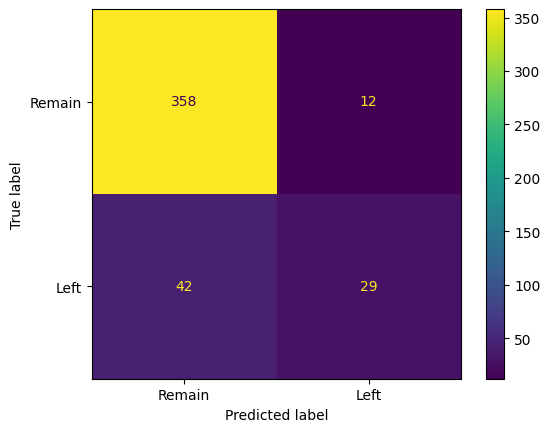


  - True Positive (Top-left)
  - False Positive(Top Right)
  -False Negative (Bottom-Left)
  - True Negative(Bottom-Right)


In [40]:
 plot_confusion_matrix(y_test,yhat_logreg)

In [41]:
Accuracy = metrics.accuracy_score(y_test, yhat_logreg)
Accuracy

0.8775510204081632

In [42]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat_logreg))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       370
           1       0.71      0.41      0.52        71

    accuracy                           0.88       441
   macro avg       0.80      0.69      0.72       441
weighted avg       0.86      0.88      0.86       441



In [43]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat_logreg,pos_label=0)

0.8689320388349514

### Conclusión Regresión Logísitica:

The model performs well predicting the people that will remain in the company with a precision of 90%; however it only identified 41% of the people that left.Overall performs well, but it is due to the predictions of class 0

No utilizaremos SVM porque el conjunto de datos es muy grande

## Decision Tree


In [44]:
parameters = {'criterion':['gini','entropy'],
              'splitter':['best'],
              'max_depth':[4,6,8],
              'max_features':['sqrt'],
              'min_samples_leaf':[1,2],
              'min_samples_split':[2,5]}

tree = DecisionTreeClassifier()

In [45]:
tree_cv = GridSearchCV(tree,parameters,cv=5)
tree_cv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'splitter': ['best']})

In [46]:
print ('Best params: ', tree_cv.best_params_)
print ('Best Score: ',tree_cv.best_score_)


Best params:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Best Score:  0.8513094956192282


In [47]:
print ('Test Accuracy: ',tree_cv.score(x_test,y_test))

Test Accuracy:  0.8049886621315193


In [48]:
yhat_tree= tree_cv.predict(x_test)

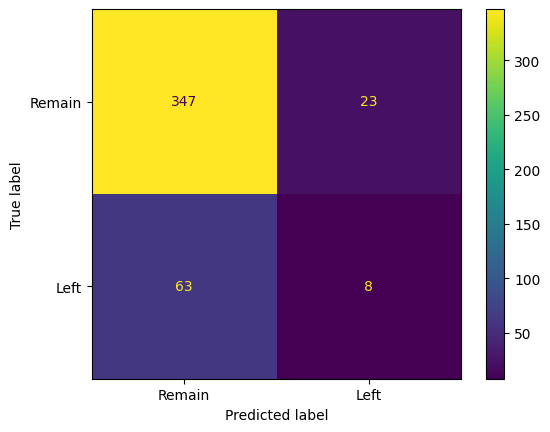


  - True Positive (Top-left)
  - False Positive(Top Right)
  -False Negative (Bottom-Left)
  - True Negative(Bottom-Right)


In [49]:
 plot_confusion_matrix(y_test,yhat_tree)

In [50]:
Accuracy = metrics.accuracy_score(y_test, yhat_tree)
Accuracy

0.8049886621315193

In [51]:
print (classification_report(y_test, yhat_tree))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       370
           1       0.26      0.11      0.16        71

    accuracy                           0.80       441
   macro avg       0.55      0.53      0.52       441
weighted avg       0.75      0.80      0.77       441



In [52]:
best_model = tree_cv.best_estimator_

if hasattr(best_model,'feature_importances_'):
  feature_importances = best_model.feature_importances_
  print (feature_importances)

[0.01548026 0.         0.         0.         0.         0.
 0.06785713 0.12471279 0.03513082 0.08361715 0.03715262 0.05972283
 0.04224848 0.         0.         0.         0.         0.
 0.04047336 0.         0.         0.         0.31052213 0.
 0.         0.         0.         0.02280437 0.         0.
 0.         0.01828298 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.14199509 0.         0.
 0.         0.         0.        ]


##  KNNeighbors

In [53]:
parameters_knn = {'n_neighbors':[2,3,5,8],
                  'algorithm':['auto','kd_tree'],
                  'p':[1,2]}

KNN = KNeighborsClassifier()

In [54]:
knn_cv = GridSearchCV(KNN,parameters_knn,cv=5)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [2, 3, 5, 8], 'p': [1, 2]})

In [55]:
print ('Best parameters: ',knn_cv.best_params_)
print ('Best Score: ',knn_cv.best_score_ )
print ('Test Accuracy :', knn_cv.score(x_test,y_test))

Best parameters:  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
Best Score:  0.8493582761070329
Test Accuracy : 0.8503401360544217


In [56]:
yhat_knn = knn_cv.predict(x_test)

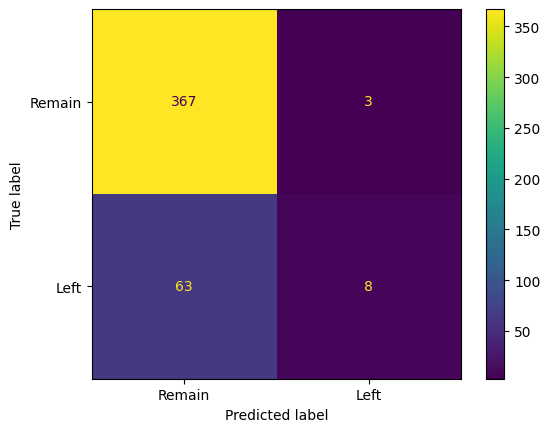


  - True Positive (Top-left)
  - False Positive(Top Right)
  -False Negative (Bottom-Left)
  - True Negative(Bottom-Right)


In [57]:
 plot_confusion_matrix(y_test,yhat_knn)

In [58]:
Accuracy = metrics.accuracy_score(y_test, yhat_knn)
Accuracy

0.8503401360544217

In [59]:
print (classification_report(y_test, yhat_tree))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       370
           1       0.26      0.11      0.16        71

    accuracy                           0.80       441
   macro avg       0.55      0.53      0.52       441
weighted avg       0.75      0.80      0.77       441



## **Report**

In [60]:
Report = {'Model': ['Logistic regression','Decision Tree','KNN'],
          'Test Score': [logreg.score(x_test,y_test),tree_cv.score(x_test,y_test),knn_cv.score(x_test,y_test)],
          'Prediction Accuracy': [metrics.accuracy_score(y_test,yhat_logreg),metrics.accuracy_score(y_test,yhat_tree),metrics.accuracy_score(y_test,yhat_knn)]}

report = pd.DataFrame(Report)
pd.set_option('display.float_format','{:.3f}'.format)
report

,Model,Test Score,Prediction Accuracy
0,Logistic regression,0.878,0.878
1,Decision Tree,0.805,0.805
2,KNN,0.850,0.850


# Red Neuronal

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## 1) Construir la Red Neuronal

Usa Sequential para definir una arquitectura de red en capas.

In [62]:
model = Sequential([
    Dense(32,activation='relu',input_shape=(x_train.shape[1],)),#Capa oculta con 32 neuronas
    Dense(16,activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 2) Compilar el Modelo

Especifica el optimizador, la función de pérdida y las métricas de evaluación.

In [63]:
model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 3) Entrenar el Modelo

Ajusta el modelo a los datos de entrenamiento.

In [64]:
neural = model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3945 - loss: 0.8515 - val_accuracy: 0.6845 - val_loss: 0.6147
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7912 - loss: 0.5530 - val_accuracy: 0.7767 - val_loss: 0.5244
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8175 - loss: 0.4800 - val_accuracy: 0.7913 - val_loss: 0.4909
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8370 - loss: 0.4193 - val_accuracy: 0.7913 - val_loss: 0.4608
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8664 - loss: 0.3655 - val_accuracy: 0.7961 - val_loss: 0.4368
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8599 - loss: 0.3649 - val_accuracy: 0.8204 - val_loss: 0.4154
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8782 - loss: 0.3234 - val_accuracy: 0.8398 - val_loss: 0.4008
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8832 - loss: 0.2937 - val_accuracy: 0.8398 - val_loss

## 4) Evaluar el Modelo

Calcula el rendimiento en el conjunto de prueba

In [65]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8702 - loss: 0.3662 
Loss: 0.3696255385875702, Accuracy: 0.8707482814788818


## 5) Usar el Modelo

Realiza predicciones con datos nuevos.

In [66]:
neural_predict = model.predict(x_test)
print(neural_predict[:5])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[0.2165405 ]
 [0.0493963 ]
 [0.2680096 ]
 [0.04408469]
 [0.08657872]]


# **Select best Features**


## **Logistic Regression**

<Axes: >

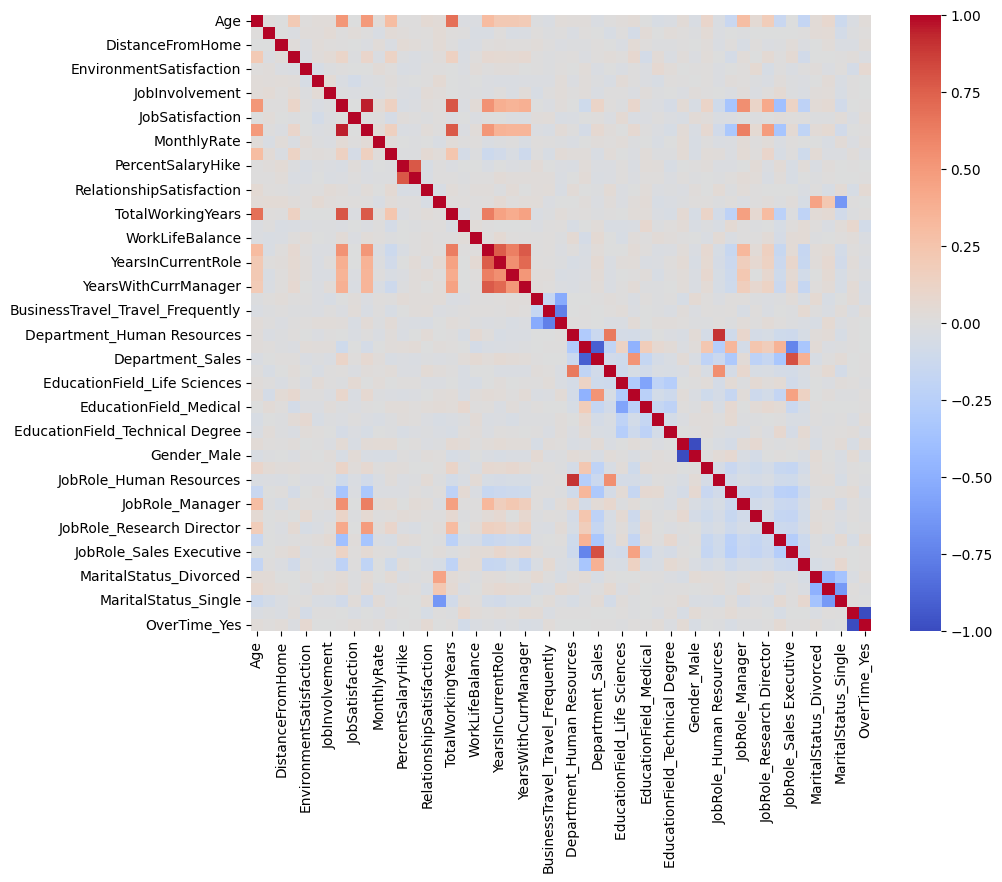

In [67]:
corr = x.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')

In [68]:
total = pd.concat([x,df['Class']],axis=1)

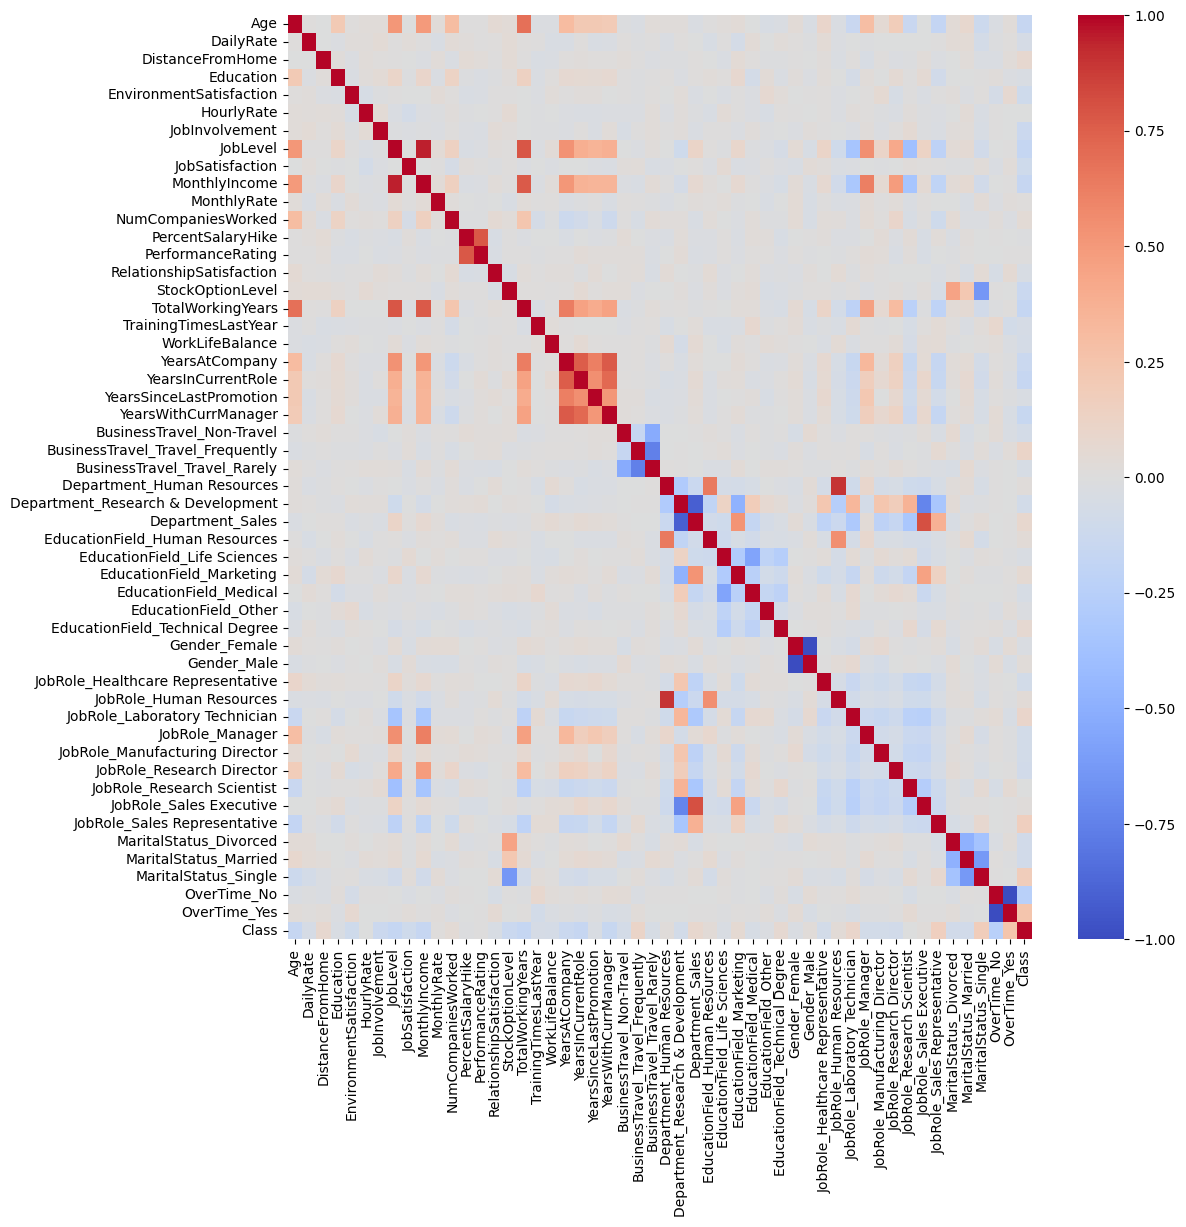

In [69]:
hm = total.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(hm, annot=False, cmap='coolwarm')  # Turn on annotations for clarity
plt.show()

In [70]:
correlations = hm['Class']
threshold =  correlations.abs().quantile(0.75)
important_features = correlations[correlations.abs() > threshold].index
print(important_features)

Index(['Age', 'JobLevel', 'MonthlyIncome', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'JobRole_Sales Representative',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes', 'Class'],
      dtype='object')


In [71]:
new_features = total[important_features]
new_features.drop('Class',axis=1)

,Age,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,JobRole_Sales Representative,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,2,5993,0,8,6,4,5,0,1,0,1
1,49,2,5130,1,10,10,7,7,0,0,1,0
2,37,1,2090,0,7,0,0,0,0,1,0,1
3,33,1,2909,0,8,8,7,0,0,0,0,1
4,27,1,3468,1,6,2,2,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,2571,1,17,5,2,3,0,0,1,0
1466,39,3,9991,1,9,7,7,7,0,0,1,0
1467,27,2,6142,1,6,6,2,3,0,0,0,1
1468,49,2,5390,0,17,9,6,8,0,0,1,0


In [72]:
num_new_features = new_features.to_numpy()
x_train,x_test, y_train,y_test = train_test_split(num_new_features,y,test_size=0.3,random_state=42)

In [73]:
parameters = {'C':[0.01,0.1,0.3,0.7,1],
              'penalty':['l2'],
              'solver': ['lbfgs']}
lr1 = LogisticRegression()
logreg1 = GridSearchCV(lr,parameters,cv=5)
logreg1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.3, 0.7, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [74]:
print ('Best params: ', logreg1.best_params_)
print ('Best Score: ',logreg1.best_score_)

Best params:  {'C': 0.3, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score:  0.9572484016102297


In [75]:
yhat_logreg1= logreg1.predict(x_test)

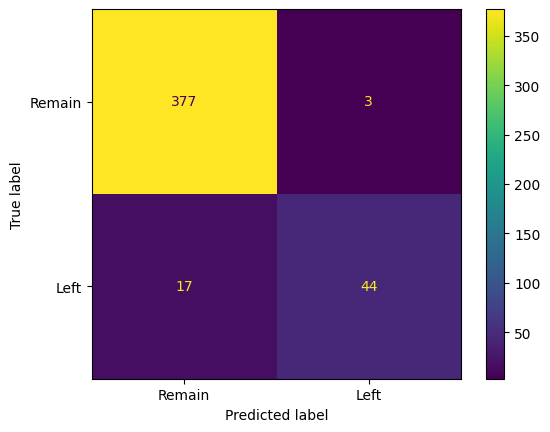


  - True Positive (Top-left)
  - False Positive(Top Right)
  -False Negative (Bottom-Left)
  - True Negative(Bottom-Right)


In [76]:
 plot_confusion_matrix(y_test,yhat_logreg1)

In [77]:
Accuracy = metrics.accuracy_score(y_test, yhat_logreg1)
Accuracy

0.9546485260770975

In [78]:
print (classification_report(y_test, yhat_logreg1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       380
           1       0.94      0.72      0.81        61

    accuracy                           0.95       441
   macro avg       0.95      0.86      0.89       441
weighted avg       0.95      0.95      0.95       441



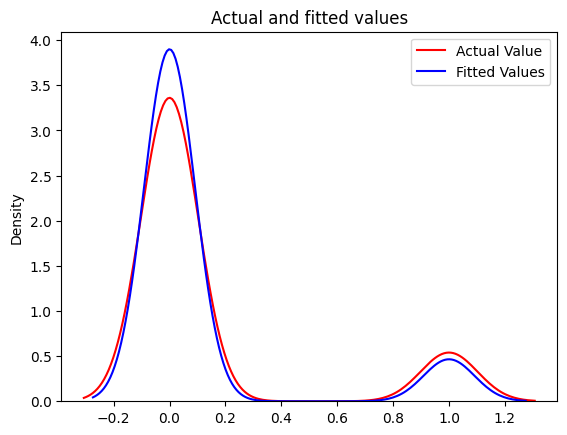

In [79]:
def actual_fitted_values_graph (y_actual,y_predicted):
  fig, ax1= plt.subplots()

  sns.kdeplot (y_actual,color='r',label='Actual Value', ax=ax1)

  sns.kdeplot(y_predicted,color='b',label="Fitted Values", ax=ax1)

  ax1.legend()


  ax1.set_title('Actual and fitted values')
  plt.show()

actual_fitted_values_graph(y_test,yhat_logreg1)

## **Decision Tree**

In [80]:
parameters = {'criterion':['gini','entropy'],
              'splitter':['best'],
              'max_depth':[4,6,8],
              'max_features':['sqrt'],
              'min_samples_leaf':[1,2],
              'min_samples_split':[2,5]}

tree = DecisionTreeClassifier()
tree_nf = GridSearchCV(tree,parameters,cv=5)
tree_nf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'splitter': ['best']})

In [81]:
print ('Best params: ', tree_nf.best_params_)
print ('Best Score: ',tree_nf.best_score_)

Best params:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best Score:  0.9932038834951455


In [82]:
yhat_tree= tree_nf.predict(x_test)

In [83]:
Accuracy_tree_nf = metrics.accuracy_score(yhat_tree,y_test)
Accuracy_tree_nf

0.9909297052154195

In [84]:
print (classification_report(y_test, yhat_tree))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       380
           1       0.98      0.95      0.97        61

    accuracy                           0.99       441
   macro avg       0.99      0.97      0.98       441
weighted avg       0.99      0.99      0.99       441



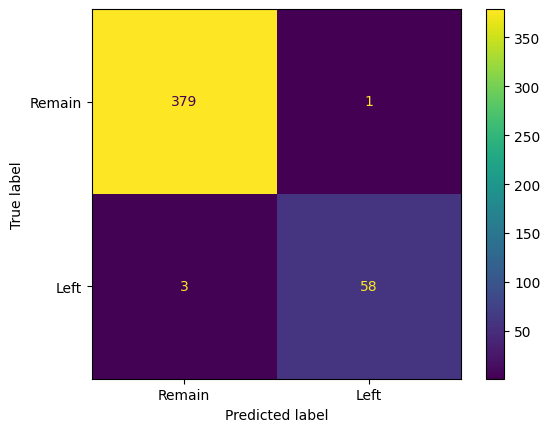


  - True Positive (Top-left)
  - False Positive(Top Right)
  -False Negative (Bottom-Left)
  - True Negative(Bottom-Right)


In [85]:
plot_confusion_matrix(y_test,yhat_tree)

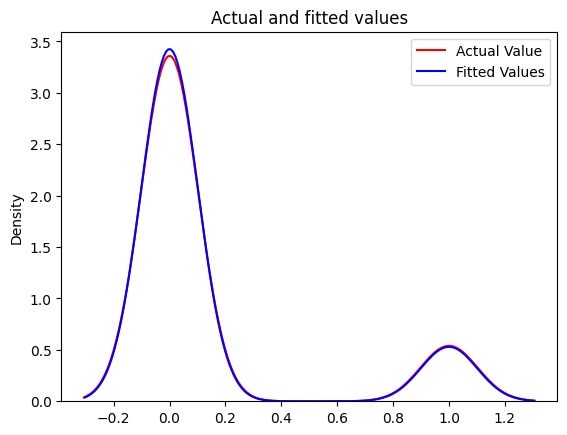

In [86]:
actual_fitted_values_graph(y_test,yhat_tree)

## **KNNeighbors**

In [87]:
parameters_knn = {'n_neighbors':[2,3,5,8],
                  'algorithm':['auto','kd_tree'],
                  'p':[1,2]}

KNN = KNeighborsClassifier()
KNN_nf = GridSearchCV(KNN,parameters_knn,cv=5)
KNN_nf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [2, 3, 5, 8], 'p': [1, 2]})

In [88]:
print ('Best params: ', KNN_nf.best_params_)
print ('Best Score: ',KNN_nf.best_score_)

Best params:  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
Best Score:  0.8318778119820033


In [89]:
yhat_knn_nf= KNN_nf.predict(x_test)

In [90]:
accuracy_knn_nf = metrics.accuracy_score(y_test,yhat_knn_nf)
accuracy_knn_nf

0.8526077097505669

In [91]:
print (classification_report(y_test, yhat_knn_nf))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       380
           1       0.25      0.03      0.06        61

    accuracy                           0.85       441
   macro avg       0.56      0.51      0.49       441
weighted avg       0.78      0.85      0.80       441



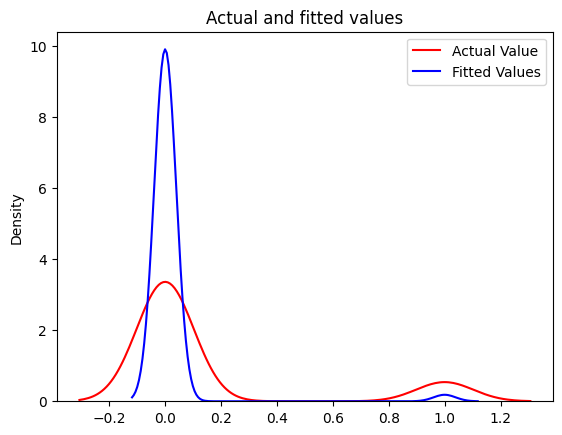

In [92]:
actual_fitted_values_graph(y_test,yhat_knn_nf)

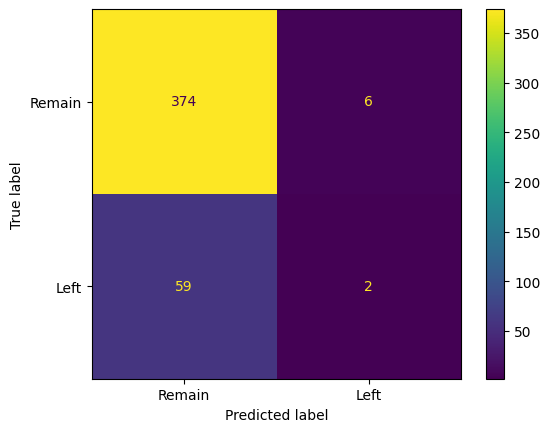


  - True Positive (Top-left)
  - False Positive(Top Right)
  -False Negative (Bottom-Left)
  - True Negative(Bottom-Right)


In [93]:
plot_confusion_matrix(y_test,yhat_knn_nf)

## **Report**

In [94]:
Report = {'Model': ['Logistic regression','Decision Tree','KNN'],
          'Test Score': [logreg1.score(x_test,y_test),tree_nf.score(x_test,y_test),KNN_nf.score(x_test,y_test)],
          'Prediction Accuracy': [metrics.accuracy_score(y_test,yhat_logreg1),metrics.accuracy_score(y_test,yhat_tree),metrics.accuracy_score(y_test,yhat_knn_nf)]}

report = pd.DataFrame(Report)
pd.set_option('display.float_format','{:.3f}'.format)
report

,Model,Test Score,Prediction Accuracy
0,Logistic regression,0.955,0.955
1,Decision Tree,0.991,0.991
2,KNN,0.853,0.853
